In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utilities import consultar,pasar_a_DF,pasar_a_datetime
import os 
from datetime import datetime
#import pyodbc

In [6]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [7]:
os.chdir(home_path)

# Publicaciones politicas

In [14]:
publicaciones_pol = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/publicaciones_politicas.csv')

Text(0.5, 1.0, 'Publicaciones politicas')

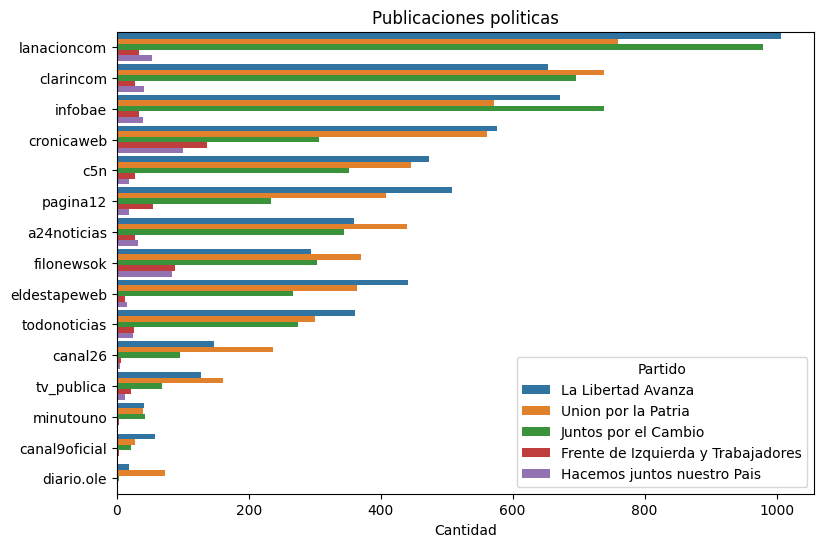

In [16]:
plt.figure(figsize=(9,6))
orden = publicaciones_pol['fuente'].value_counts().index 
hue_orden = publicaciones_pol['Partido'].value_counts().index 
sns.countplot(data=publicaciones_pol, y = 'fuente',
              hue='Partido',
              order=orden,
              dodge=True,
              hue_order=hue_orden,
              width=0.9)
plt.ylabel('')
plt.xlabel('Cantidad')
plt.title('Publicaciones politicas')


Text(0.5, 1.0, 'Likes por Partidos')

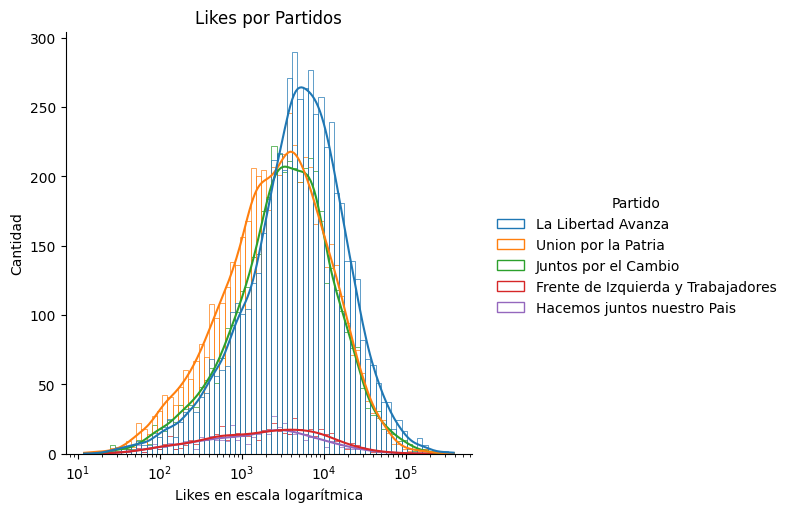

In [17]:
sns.displot(data=publicaciones_pol,x='cantidad_likes',hue='Partido',
            kde=True,aspect=1, fill=False,log_scale=True)
plt.xlabel('Likes en escala logarítmica')
plt.ylabel('Cantidad')
plt.title('Likes por Partidos')

In [18]:
publicaciones_pol.columns

Index(['cantidad_likes', 'fecha', 'fuente', 'Partido'], dtype='object')

In [42]:
publicaciones_pol['fecha'] = publicaciones_pol['fecha'].map(lambda x:pasar_a_datetime(x))

# Cantidad likes
Para una fuente en especifico

#REVISANDO ACTUALIZACIONES


In [23]:
consulta_act = """
            SELECT *
            FROM Fuentes
                """

In [24]:
df = pasar_a_DF(consultar(consulta_act))

In [25]:
df.sort_values(by='cant_publicaciones',inplace=True)

Text(0.5, 0, '')

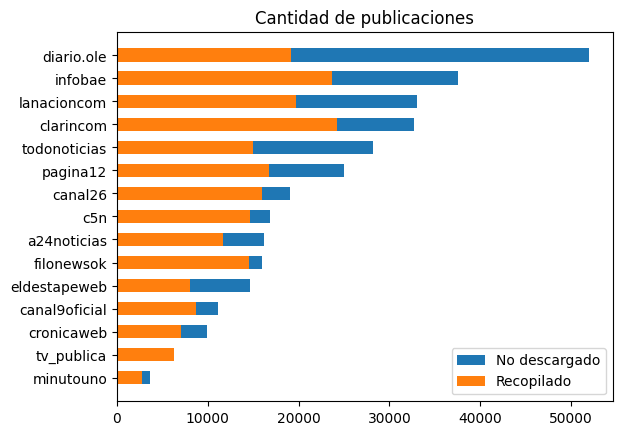

In [26]:
fuentes = df['nombre'].unique()
cant_publicaciones = {
    "No descargado": df['cant_publicaciones'].to_numpy(),
    "Recopilado": df['cant_recopilado'].to_numpy(),
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(15)

for boolean, pub in cant_publicaciones.items():
    p = ax.barh(fuentes, pub, width, label=boolean)
    bottom += pub

ax.set_title("Cantidad de publicaciones")
ax.legend(loc="lower right")
ax.set_xlabel('')

Text(0.5, 0, 'Cantidad')

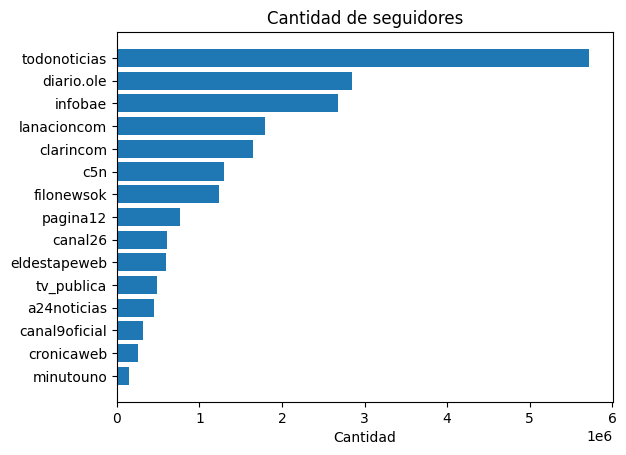

In [27]:
cant_seguidoress = df['cant_seguidores'].sort_values(ascending=True).to_numpy()
fuentes = df.sort_values(by='cant_seguidores',ascending=True)['nombre'].unique()
cant_seguidores = {
    "Cant. Publicaciones": cant_seguidoress,
}
width = 0.8

fig, ax = plt.subplots()
bottom = np.zeros(15)

for nombre, pub in cant_seguidores.items():
    p = ax.barh(fuentes, pub, width, label=nombre)
    bottom += pub

ax.set_title("Cantidad de seguidores")
ax.set_xlabel('Cantidad')
